In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ep_dt = pd.read_csv(r"./data_train/number_16_seed_1/episode_data.csv")
ep_dt

,Unnamed: 0,episode,acc rewards,total rev,park rev,char rev,park refuse,char refuse,travel cost,cruise cost
0,0,1,-2150,10030.2,7227.6,2802.6,285,24,2626,3.291479
1,1,2,-900,10556.9,7117.5,3439.4,282,4,2762,24.441442
2,2,3,-1040,10602.9,6997.0,3605.9,298,1,2501,31.985443
3,3,4,-1260,10787.4,7299.5,3487.9,306,2,2466,15.761713
4,4,5,-1040,10647.4,6984.5,3662.9,301,0,2579,35.472495
...,...,...,...,...,...,...,...,...,...,...
456,456,457,-600,10982.5,7319.6,3662.9,279,0,2811,30.127863
457,457,458,-480,11228.5,7565.6,3662.9,273,0,3101,13.660853
458,458,459,-660,11003.2,7340.3,3662.9,282,0,2948,18.495922
459,459,460,-660,10891.4,7228.5,3662.9,282,0,2882,25.504440


In [27]:
epi_refuse = np.array((ep_dt['park refuse'] + ep_dt['char refuse']).values)

In [28]:
epi_refuse

array([309, 286, 299, 308, 301, 287, 284, 297, 300, 284, 274, 295, 300,
       295, 299, 299, 306, 304, 303, 288, 303, 296, 296, 284, 283, 296,
       299, 301, 305, 297, 296, 298, 295, 296, 298, 301, 298, 302, 297,
       294, 294, 295, 298, 300, 299, 298, 294, 292, 299, 299, 296, 301,
       300, 296, 303, 300, 299, 299, 294, 289, 302, 291, 293, 293, 299,
       298, 297, 295, 291, 288, 287, 290, 279, 283, 291, 285, 285, 282,
       281, 291, 286, 292, 289, 295, 292, 273, 295, 285, 293, 281, 288,
       285, 284, 283, 288, 287, 288, 282, 287, 285, 289, 298, 292, 283,
       274, 275, 268, 276, 279, 277, 290, 277, 283, 294, 299, 282, 304,
       289, 292, 292, 290, 294, 292, 293, 289, 279, 277, 276, 292, 283,
       295, 290, 283, 287, 280, 290, 282, 286, 289, 289, 289, 295, 288,
       294, 291, 290, 288, 297, 279, 292, 274, 291, 286, 285, 295, 291,
       293, 301, 291, 296, 295, 288, 281, 288, 295, 292, 286, 288, 291,
       285, 287, 278, 276, 290, 286, 279, 283, 287, 290, 291, 29

In [6]:
fbfs_refuse = 291
so_refuse = 244
dp_refuse = 299
rdp_refuse = 303

fbfs_revenue = 10867.59
so_revenue = 12782.1
dp_revenue = 10916.60
rdp_revenue = 10980.09

In [36]:
def moving_average(reward, window_size):
  smoothed_reward = np.zeros_like(reward)
  for i in range(len(reward)):
    if i < window_size:
      smoothed_reward[i] = np.mean(reward[:i + 1])
    else:
      smoothed_reward[i] = np.mean(reward[i - window_size + 1:i + 1])
  return smoothed_reward
moving_average_reward = moving_average(epi_refuse,10)

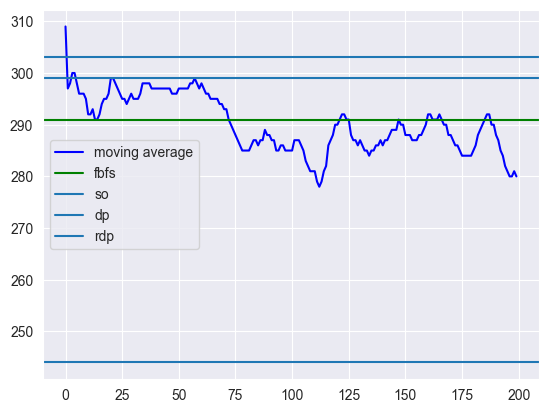

In [43]:
# plt.plot(epi_refuse[:200],'r',label='origin')
plt.plot(moving_average_reward[:200],'b',label='moving average')
plt.axhline(y=fbfs_refuse,color='g',label='fbfs')
plt.axhline(y=so_refuse,label='so')
plt.axhline(y=dp_refuse,label='dp')
plt.axhline(y=rdp_refuse,label='rdp')
plt.legend()
plt.show()

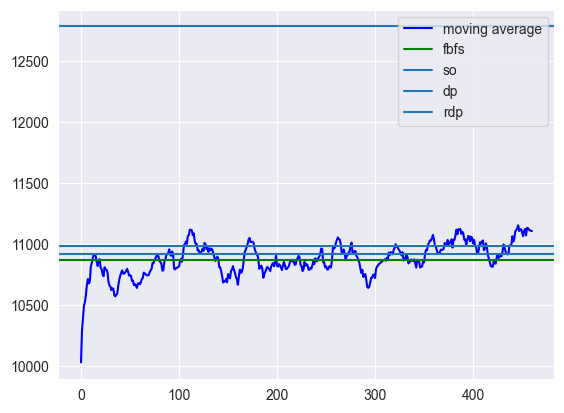

In [38]:
revenue = ep_dt['total rev']
moving_average_revenue = moving_average(revenue,10)
# plt.plot(revenue,'r',label='origin')
plt.plot(moving_average_revenue,'b',label='moving average')
plt.axhline(y=fbfs_revenue,color='g',label='fbfs')
plt.axhline(y=so_revenue,label='so')
plt.axhline(y=dp_revenue,label='dp')
plt.axhline(y=rdp_revenue,label='rdp')
plt.legend()
plt.show()

Text(0.5, 1.0, 'refuse')

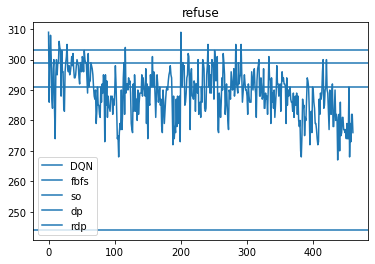

In [7]:
plt.plot(epi_refuse,label='DQN')
plt.axhline(y=fbfs_refuse,label='fbfs')
plt.axhline(y=so_refuse,label='so')
plt.axhline(y=dp_refuse,label='dp')
plt.axhline(y=rdp_refuse,label='rdp')
plt.legend()
plt.title('refuse')

Text(0.5, 1.0, 'revenue')

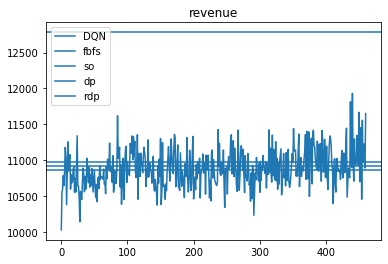

In [8]:
plt.plot(ep_dt['total rev'].values,label='DQN')
plt.axhline(y=fbfs_revenue,label='fbfs')
plt.axhline(y=so_revenue,label='so')
plt.axhline(y=dp_revenue,label='dp')
plt.axhline(y=rdp_revenue,label='rdp')
plt.legend()
plt.title('revenue')

In [8]:
dqn_assign = pd.read_csv(r"./data_episode/number_16_seed_1/episode_270_assign.csv")
dqn_assign

,Unnamed: 0,req_info,t,req_id,pl_num
0,0,1,0,[0 0 0 0],13
1,1,2,401,[83 0 0 2],13
2,2,3,0,[0 0 0 0],9
3,3,4,0,[0 0 0 0],13
4,4,5,0,[0 0 0 0],13
...,...,...,...,...,...
1560,1560,1437,0,[0 0 0 0],13
1561,1561,1438,0,[0 0 0 0],13
1562,1562,1439,0,[0 0 0 0],13
1563,1563,1440,0,[0 0 0 0],13


In [9]:
columns_mapping = {'req_info':'t','t':'req_id','req_id':'req_info'}
dqn_assign.rename(columns=columns_mapping,inplace=True)
dqn_assign = dqn_assign.iloc[:,1:]
dqn_assign

,t,req_id,req_info,pl_num
0,1,0,[0 0 0 0],13
1,2,401,[83 0 0 2],13
2,3,0,[0 0 0 0],9
3,4,0,[0 0 0 0],13
4,5,0,[0 0 0 0],13
...,...,...,...,...
1560,1437,0,[0 0 0 0],13
1561,1438,0,[0 0 0 0],13
1562,1439,0,[0 0 0 0],13
1563,1440,0,[0 0 0 0],13


In [6]:
dqn_assign['pl_num'] = dqn_assign['pl_num'][1:]

In [12]:
temp = list(dqn_assign['pl_num'][1:].values)

In [13]:
temp.append(0)

In [15]:
dqn_assign['pl_num'] = temp
dqn_assign

,t,req_id,req_info,pl_num
0,1,0,[0 0 0 0],13
1,2,401,[83 0 0 2],9
2,3,0,[0 0 0 0],13
3,4,0,[0 0 0 0],13
4,5,0,[0 0 0 0],13
...,...,...,...,...
1560,1437,0,[0 0 0 0],13
1561,1438,0,[0 0 0 0],13
1562,1439,0,[0 0 0 0],13
1563,1440,0,[0 0 0 0],13


In [40]:
new_ep_data = pd.read_csv("./data_train/number_17_seed_1/episode_data.csv")
new_ep_data

,Unnamed: 0,episode,acc rewards,total rev,park rev,char rev,park refuse,char refuse,travel cost,cruise cost
0,0,1,-2150,10030.2,7227.6,2802.6,285,24,2626,3.291479
1,1,2,-900,10556.9,7117.5,3439.4,282,4,2762,24.441442
2,2,3,-1040,10602.9,6997.0,3605.9,298,1,2501,31.985443
3,3,4,-1260,10787.4,7299.5,3487.9,306,2,2466,15.761713
4,4,5,-1040,10647.4,6984.5,3662.9,301,0,2579,35.472495
...,...,...,...,...,...,...,...,...,...,...
456,456,457,-600,10982.5,7319.6,3662.9,279,0,2811,30.127863
457,457,458,-480,11228.5,7565.6,3662.9,273,0,3101,13.660853
458,458,459,-660,11003.2,7340.3,3662.9,282,0,2948,18.495922
459,459,460,-660,10891.4,7228.5,3662.9,282,0,2882,25.504440


In [47]:
refuse = new_ep_data['park refuse'] + new_ep_data['char refuse']
smooth_refuse = moving_average(refuse,10)

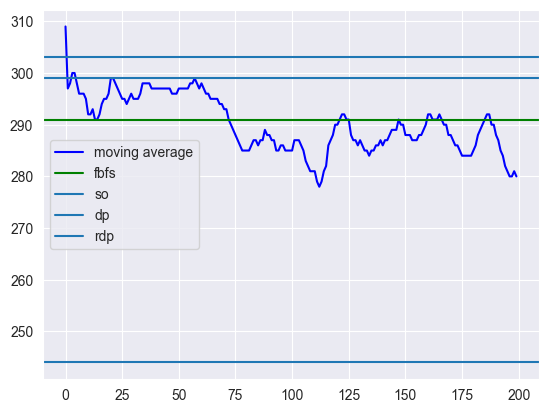

In [51]:
# plt.plot(refuse,'r',label='origin')
plt.plot(smooth_refuse[:200],'b',label='moving average')
plt.axhline(y=fbfs_refuse,color='g',label='fbfs')
plt.axhline(y=so_refuse,label='so')
plt.axhline(y=dp_refuse,label='dp')
plt.axhline(y=rdp_refuse,label='rdp')
plt.legend()
plt.show()

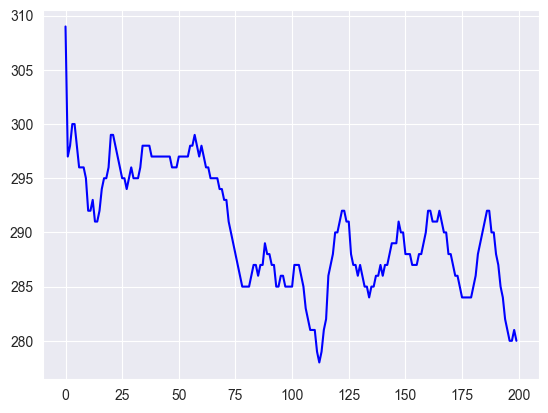

In [52]:
plt.plot(smooth_refuse[:200],'b',label='moving average')